W pierwszej kolejności zbuduję autoencoder dla zbioru MNIST

In [1]:
import os
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


from utils.loaders import load_mnist, load_model
from models.AE import Autoencoder

Using TensorFlow backend.


In [2]:
# ustalam parametry
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

MODE =  'build' #'load' #

In [4]:
# pobieramy dane 
(x_train, y_train), (x_test, y_test) = load_mnist()

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

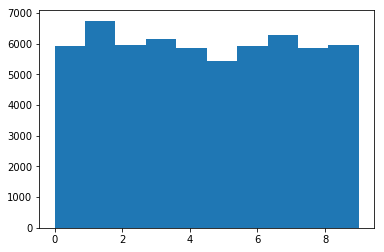

In [31]:
from collections import Counter 
import matplotlib.pyplot as plt
c = Counter(y_train)

plt.hist(list(y_train)) 

In [32]:
# definicja struktury autoenkodera
AE = Autoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

if MODE == 'build':
    AE.save(RUN_FOLDER)
else:
    AE.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

W0122 22:22:02.100699 30960 module_wrapper.py:139] From E:\Python\Anaconda\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0122 22:22:02.113566 30960 module_wrapper.py:139] From E:\Python\Anaconda\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
AE.encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 64)          0         
__________

In [33]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
INITIAL_EPOCH = 0

In [8]:
AE.compile(LEARNING_RATE)

W0120 22:54:13.462121 38352 module_wrapper.py:139] From E:\Python\Anaconda\envs\generative\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [ ]:
AE.train(     
    x_train[:1000]
    , batch_size = BATCH_SIZE
    , epochs = 200
    , run_folder = RUN_FOLDER
    , initial_epoch = INITIAL_EPOCH
)

In [34]:
# ładujemy model jeżeli wystartujemy kolejny raz żeby nie trzeba było go trenować za każdym razem
AE = load_model(Autoencoder, RUN_FOLDER)

W0122 22:22:15.014716 30960 module_wrapper.py:139] From E:\Python\Anaconda\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0122 22:22:15.015717 30960 module_wrapper.py:139] From E:\Python\Anaconda\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0122 22:22:15.015836 30960 module_wrapper.py:139] From E:\Python\Anaconda\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0122 22:22:15.177628 30960 module_wrapper.py:139] From E:\Python\Anaconda\envs\generative\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0122 22:22:15.178639 30960 module_wrapper

In [ ]:
# możliwe wartości parametru cmap
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 
'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 
'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 
'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 
'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 
'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 
'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 
'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 
'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 
'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 
'viridis', 'viridis_r', 'winter', 'winter_r'

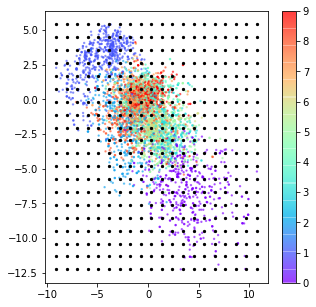

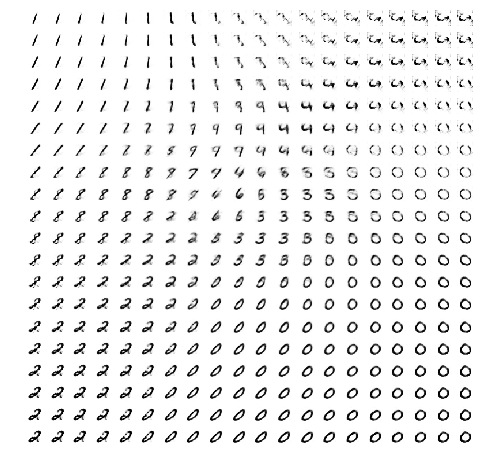

In [35]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = AE.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=5)

plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

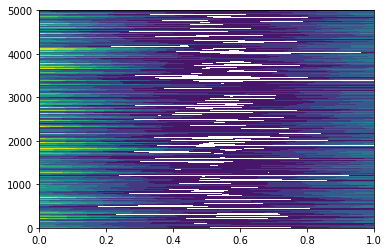

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

x0s = np.linspace(-10, 10, 100)
x1s = np.linspace(-12.5, 5, 100)
x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]

y_pred = clf.predict(X).reshape(x0.shape)
y_decision = clf.decision_function(X).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [23]:
display(example_labels)

array([6, 0, 1, ..., 7, 4, 0], dtype=uint8)

In [73]:
# budowa modelu SVM. Zbiorem treningowym będzie warstwa ukryta, zmienną celu natomiast nasza liczba
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

# tworzę wartswę ukrytą i na niej buduję multiklasowy model SVM 
X_svm = AE.encoder.predict(x_test)
y_svm = y_test

# wartości brzegowe przestrzeni ukrytej
print(np.min(X_svm[:,0]), np.max(X_svm[:,0]))
print(np.min(X_svm[:,1]), np.max(X_svm[:,1]))


SVC(C=100, decision_function_shape='ovo', gamma=5)

In [97]:
def plot_comparitions(clf, axis, clf_par, z_points, example_labels):
    x0s = np.linspace(axis[0], axis[1], 100)
    x1s = np.linspace(axis[2], axis[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xn = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(Xn).reshape(x0.shape)
    #wykresy
    fig, axes = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)
    plt.sca(axes[0])
    plt.contourf(x0, x1, y_pred, cmap='rainbow', levels=[0,1,2,3,4,5,6,7,8,9],  alpha=0.5)
    plt.colorbar()
    plt.title("Obszar predykcji SVM, C={0}, gamma={1}".format(clf_par[0],clf_par[1]), fontsize=14)
    plt.sca(axes[1])
    plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
                , alpha=0.5, s=2)
    plt.colorbar()
    plt.title(r"Przestrzeń ukryta autoenkodera", fontsize=14)
    plt.ylabel("")
    plt.show()

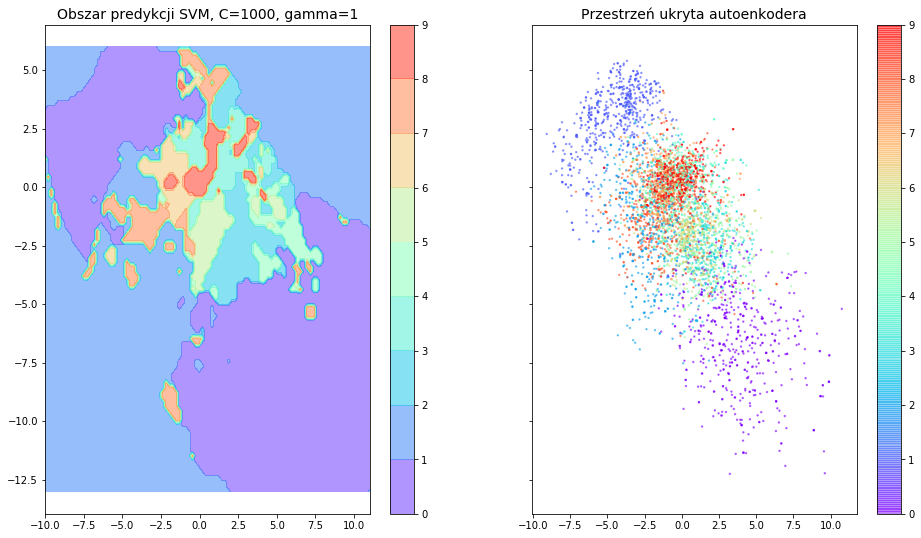

In [92]:
# należy podmienic ovr na ovo bo to zmieniło się w ostatniej wersji na domyślna
svm_model  = SVC(kernel='rbf', gamma = 1, C=1000, decision_function_shape='ovo')
svm_model.fit(X_svm, y_svm)

plot_comparitions(svm_model, [-10.0, 11.0, -13.0, 6.0], [1000,1], z_points, example_labels)

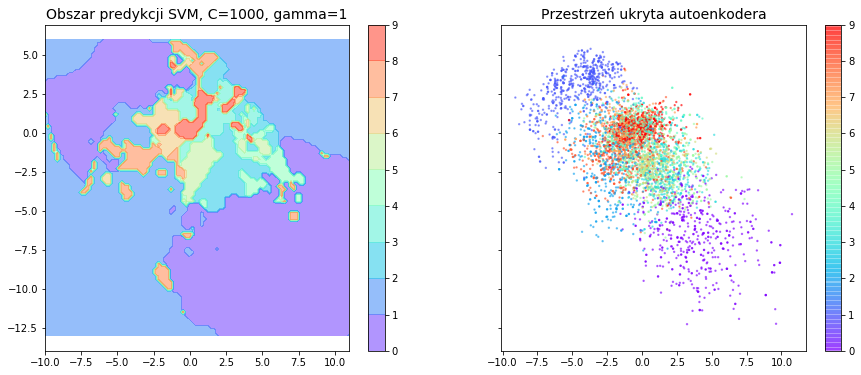

In [98]:
plot_comparitions(svm_model, [-10.0, 11.0, -13.0, 6.0], [1000,1], z_points, example_labels)

In [62]:
print(svm_model.classes_)
print(svm_model.n_features_in_)

[0 1 2 3 4 5 6 7 8 9]
2


-9.40345 11.00873
-12.710449 5.8599863


In [79]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xn = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(Xn).reshape(x0.shape)
    y_decision = clf.decision_function(Xn).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [88]:
#plot_predictions(svm_model, [-10.0,11.0, -13.0, 6.0])

x0s = np.linspace(-10.0, 11.0, 100)
x1s = np.linspace(-13.0, 6.0, 100)
x0, x1 = np.meshgrid(x0s, x1s)
Xn = np.c_[x0.ravel(), x1.ravel()]

y_pred = svm_model.predict(Xn) 
y_pred = y_pred.reshape(x0.shape)
#y_decision = svm_model.decision_function(Xn).reshape(x0.shape) # mamy 45 różnych funkcji decyzyjnych, kazda dla 

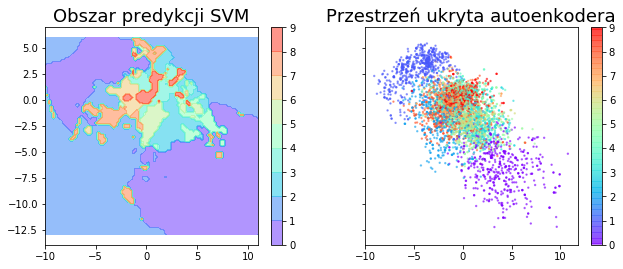

In [89]:
#plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg,  alpha=0.2)
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)
plt.sca(axes[0])
plt.contourf(x0, x1, y_pred, cmap='rainbow', levels=[0,1,2,3,4,5,6,7,8,9],  alpha=0.2)
plt.colorbar()
plt.title(r"Obszar predykcji SVM", fontsize=18)

plt.sca(axes[1])
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()
plt.title(r"Przestrzeń ukryta autoenkodera", fontsize=18)
plt.ylabel("")


plt.show()

ValueError: cannot reshape array of size 100000 into shape (100,100)

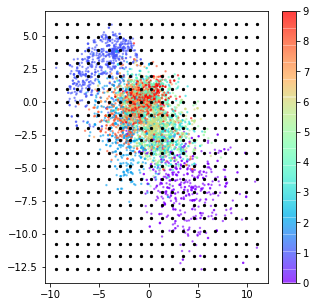

In [29]:

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# x = norm.ppf(np.linspace(0.05, 0.95, 10))
# y = norm.ppf(np.linspace(0.05, 0.95, 10))
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = AE.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=5)

plot_predictions(svm_model, [-10.0,10.0, -12.5, 5.0])

plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')